In [20]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn import metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

X_test= pd.read_csv('./X_test_aggregated.csv',  index_col=0)
y_test= pd.read_csv('./y_test_agg.csv')
X_test.fillna(0,inplace=True)
df=pd.read_csv('./df_train_downsampled7030.csv',  index_col=0)
X_train=df.iloc[:,:-1]
y_train = df.iloc[:,-1]

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn import metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

steps = [('rfc', RandomForestClassifier(n_estimators = 3, criterion = 'entropy', 
                                        random_state = 0,class_weight='balanced',
                                        min_samples_split=50,oob_score=True,
                                        max_features='log2',max_depth=50))]
model = Pipeline(steps)
model = model.fit(X_train,y_train)  #criterion = 'gini'

In [7]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Accuracy: 0.8521256931608133


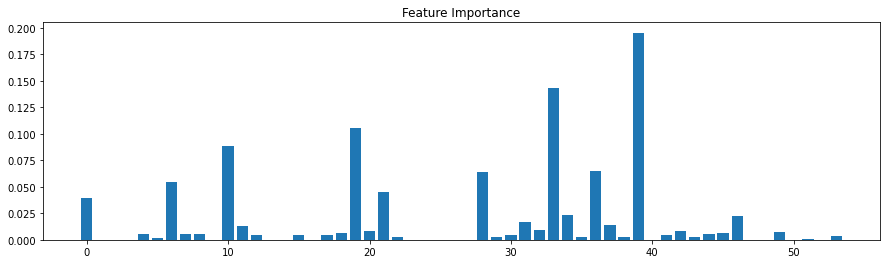

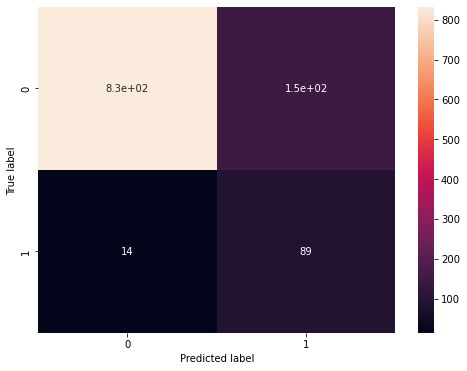

roc_auc_score for the train dataset: 0.97
roc_auc_score for the test dataset: 0.93


<Figure size 432x288 with 0 Axes>

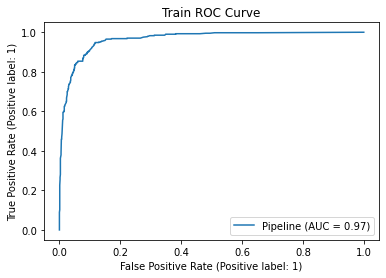

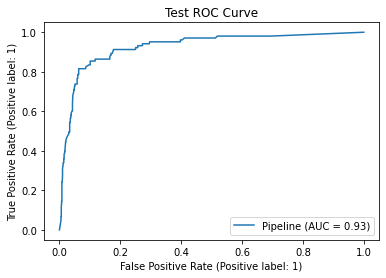

PR-AUC is 0.60


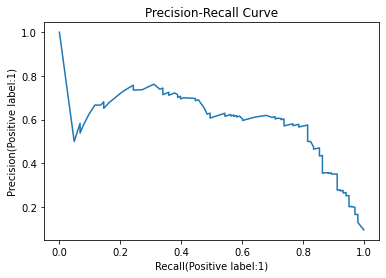

---------------------Train Classification Report--------------------------------
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       940
           1       0.78      0.94      0.85       403

    accuracy                           0.90      1343
   macro avg       0.87      0.91      0.89      1343
weighted avg       0.91      0.90      0.90      1343

---------------------Test Classification Report--------------------------------
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       979
           1       0.38      0.86      0.53       103

    accuracy                           0.85      1082
   macro avg       0.68      0.86      0.72      1082
weighted avg       0.93      0.85      0.88      1082



In [10]:
# Accuracy

print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

# Feature_importances

feat_labels = X_train.columns
importances = model.steps[0][1].feature_importances_
indices = np.argsort(importances)[::-1]
res=[]
for f in range(X_train.shape[1]):
    #print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    res.append([feat_labels[indices[f]], importances[indices[f]]])
df_importances=pd.DataFrame(res)
threshold = 0.055
list(df_importances[df_importances[1]>threshold ][0])# feature importance > threshold 

# plot feature importance
plt.figure(figsize=(15,4))
plt.bar([x for x in range(len(importances))], importances)
plt.title('Feature Importance')

plt.show()

# Confusion_matrix

confusion_matrix(y_test, y_test_pred)


plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)
#plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, preds)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Roc_Auc_Score

from sklearn.metrics import roc_auc_score
roc_auc_score_train = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])  
roc_auc_score_test  = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print('roc_auc_score for the train dataset: {:.2f}'.format(roc_auc_score_train))
print('roc_auc_score for the test dataset: {:.2f}'.format(roc_auc_score_test))

from sklearn.metrics import plot_roc_curve 

plt.figure(1).clf()

plot_roc_curve(model, X_train, y_train)

plt.title('Train ROC Curve')
plot_roc_curve(model, X_test, y_test)

plt.title('Test ROC Curve')
plt.show()
# PR_AUC

y_test_proba = model.predict_proba(X_test)
y_score = y_test_proba[:, 1]

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc,plot_precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
auc_precision_recall = auc(recall, precision)
print('PR-AUC is {:.2f}'.format(auc_precision_recall))

# plot PR curve
plt.plot(recall, precision)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve')
plt.show()


# Classification_report

from sklearn.metrics import classification_report
print('---------------------Train Classification Report--------------------------------')
print(classification_report(y_train, y_train_pred))
print('---------------------Test Classification Report--------------------------------')
print(classification_report(y_test, y_test_pred))

from sklearn.tree import export_graphviz
estimator = model.steps[0][1].estimators_[1]
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_train.columns ,
                class_names = ['Yes','No'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree_add_weight_7030.png')

# Add Weight

In [21]:
[{0: 1, 1: 1}, {0: 1, 1: 3.33}] 

(1343, 54)

In [54]:
steps = [('rfc', RandomForestClassifier(n_estimators = 3, criterion = 'entropy', 
                                        random_state = 0,
                                        min_samples_split=50,oob_score=True,
                                        max_features='log2',max_depth=50 ,class_weight={0:3.33, 1:1}))]
model = Pipeline(steps)
model = model.fit(X_train,y_train)  #criterion = 'gini'
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

Accuracy: 0.9316081330868762


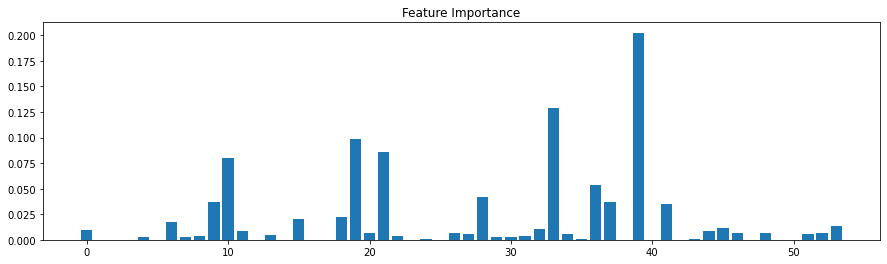

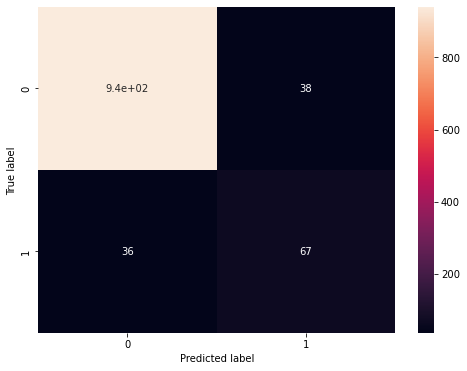

roc_auc_score for the train dataset: 0.97
roc_auc_score for the test dataset: 0.93


<Figure size 432x288 with 0 Axes>

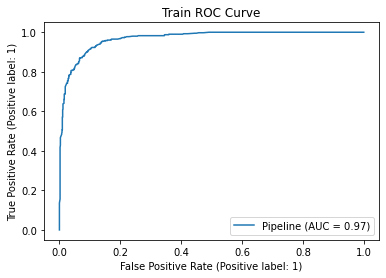

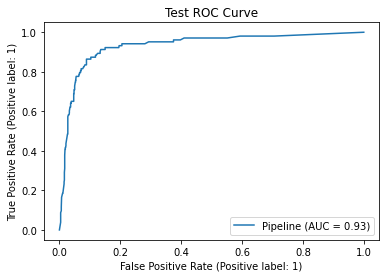

PR-AUC is 0.60


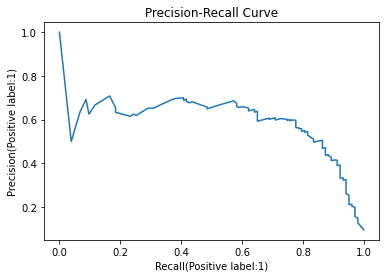

---------------------Train Classification Report--------------------------------
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       940
           1       0.95      0.68      0.79       403

    accuracy                           0.89      1343
   macro avg       0.91      0.83      0.86      1343
weighted avg       0.90      0.89      0.89      1343

---------------------Test Classification Report--------------------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       979
           1       0.64      0.65      0.64       103

    accuracy                           0.93      1082
   macro avg       0.80      0.81      0.80      1082
weighted avg       0.93      0.93      0.93      1082



In [55]:
# Accuracy

print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

# Feature_importances

feat_labels = X_train.columns
importances = model.steps[0][1].feature_importances_
indices = np.argsort(importances)[::-1]
res=[]
for f in range(X_train.shape[1]):
    #print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    res.append([feat_labels[indices[f]], importances[indices[f]]])
df_importances=pd.DataFrame(res)
threshold = 0.055
list(df_importances[df_importances[1]>threshold ][0])# feature importance > threshold 

# plot feature importance
plt.figure(figsize=(15,4))
plt.bar([x for x in range(len(importances))], importances)
plt.title('Feature Importance')

plt.show()

# Confusion_matrix

confusion_matrix(y_test, y_test_pred)


plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)
#plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, preds)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Roc_Auc_Score

from sklearn.metrics import roc_auc_score
roc_auc_score_train = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])  
roc_auc_score_test  = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print('roc_auc_score for the train dataset: {:.2f}'.format(roc_auc_score_train))
print('roc_auc_score for the test dataset: {:.2f}'.format(roc_auc_score_test))

from sklearn.metrics import plot_roc_curve 

plt.figure(1).clf()

plot_roc_curve(model, X_train, y_train)

plt.title('Train ROC Curve')
plot_roc_curve(model, X_test, y_test)

plt.title('Test ROC Curve')
plt.show()
# PR_AUC

y_test_proba = model.predict_proba(X_test)
y_score = y_test_proba[:, 1]

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc,plot_precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
auc_precision_recall = auc(recall, precision)
print('PR-AUC is {:.2f}'.format(auc_precision_recall))

# plot PR curve
plt.plot(recall, precision)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve')
plt.show()


# Classification_report

from sklearn.metrics import classification_report
print('---------------------Train Classification Report--------------------------------')
print(classification_report(y_train, y_train_pred))
print('---------------------Test Classification Report--------------------------------')
print(classification_report(y_test, y_test_pred))

from sklearn.tree import export_graphviz
estimator = model.steps[0][1].estimators_[1]
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_train.columns ,
                class_names = ['Yes','No'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree_add_weight_7030.png')

# 50:50

In [11]:
df=pd.read_csv('./df_train_downsampled7030.csv',  index_col=0)
X_train=df.iloc[:,:-1]
y_train = df.iloc[:,-1]

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn import metrics 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score

steps = [('rfc', RandomForestClassifier(n_estimators = 3, criterion = 'entropy', 
                                        random_state = 0,class_weight='balanced',
                                        min_samples_split=50,oob_score=True,
                                        max_features='log2',max_depth=50))]
model = Pipeline(steps)
model = model.fit(X_train,y_train)  #criterion = 'gini'
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


Accuracy: 0.8521256931608133


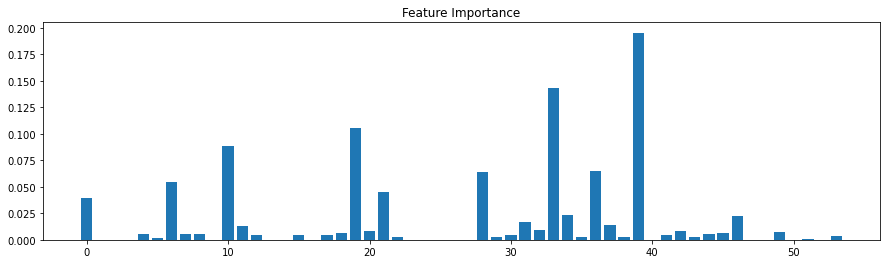

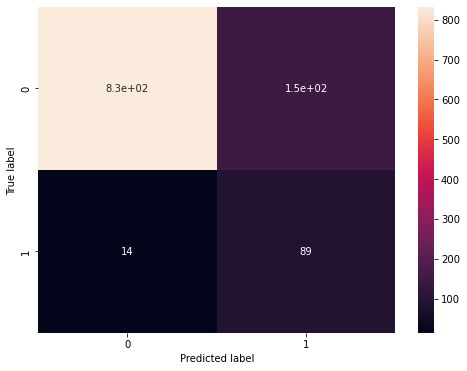

roc_auc_score for the train dataset: 0.97
roc_auc_score for the test dataset: 0.93


<Figure size 432x288 with 0 Axes>

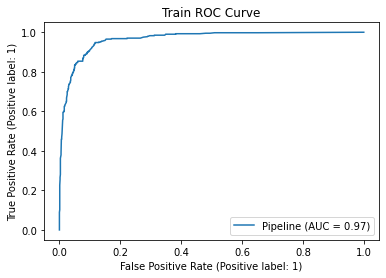

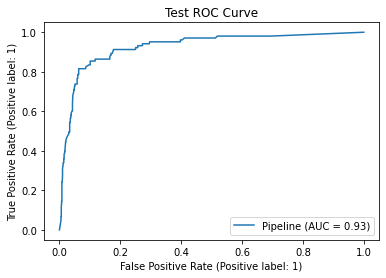

PR-AUC is 0.60


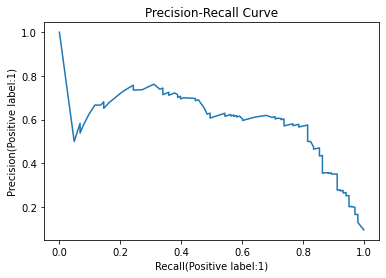

---------------------Train Classification Report--------------------------------
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       940
           1       0.78      0.94      0.85       403

    accuracy                           0.90      1343
   macro avg       0.87      0.91      0.89      1343
weighted avg       0.91      0.90      0.90      1343

---------------------Test Classification Report--------------------------------
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       979
           1       0.38      0.86      0.53       103

    accuracy                           0.85      1082
   macro avg       0.68      0.86      0.72      1082
weighted avg       0.93      0.85      0.88      1082



In [16]:
# Accuracy

print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))

# Feature_importances

feat_labels = X_train.columns
importances = model.steps[0][1].feature_importances_
indices = np.argsort(importances)[::-1]
res=[]
for f in range(X_train.shape[1]):
    #print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
    res.append([feat_labels[indices[f]], importances[indices[f]]])
df_importances=pd.DataFrame(res)
threshold = 0.055
list(df_importances[df_importances[1]>threshold ][0])# feature importance > threshold 

# plot feature importance
plt.figure(figsize=(15,4))
plt.bar([x for x in range(len(importances))], importances)
plt.title('Feature Importance')

plt.show()

# Confusion_matrix

confusion_matrix(y_test, y_test_pred)


plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True)
#plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, preds)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Roc_Auc_Score

from sklearn.metrics import roc_auc_score
roc_auc_score_train = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])  
roc_auc_score_test  = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print('roc_auc_score for the train dataset: {:.2f}'.format(roc_auc_score_train))
print('roc_auc_score for the test dataset: {:.2f}'.format(roc_auc_score_test))

from sklearn.metrics import plot_roc_curve 

plt.figure(1).clf()

plot_roc_curve(model, X_train, y_train)

plt.title('Train ROC Curve')
plot_roc_curve(model, X_test, y_test)

plt.title('Test ROC Curve')
plt.show()

# PR_AUC

y_test_proba = model.predict_proba(X_test)
y_score = y_test_proba[:, 1]

from sklearn.metrics import precision_recall_curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html

from sklearn.metrics import auc,plot_precision_recall_curve
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

# Data to plot precision - recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_score)
# Use AUC function to calculate the area under the curve of precision recall curve
auc_precision_recall = auc(recall, precision)
print('PR-AUC is {:.2f}'.format(auc_precision_recall))

# plot PR curve
plt.plot(recall, precision)
plt.xlabel('Recall(Positive label:1)')
plt.ylabel('Precision(Positive label:1)')
plt.title('Precision-Recall Curve')
plt.show()


# Classification_report

from sklearn.metrics import classification_report
print('---------------------Train Classification Report--------------------------------')
print(classification_report(y_train, y_train_pred))
print('---------------------Test Classification Report--------------------------------')
print(classification_report(y_test, y_test_pred))

from sklearn.tree import export_graphviz
estimator = model.steps[0][1].estimators_[1]
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_train.columns ,
                class_names = ['Yes','No'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
import pydot

(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('5050.png')